In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
train_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [2]:
question = pd.read_csv("questions.csv")

In [3]:
question.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [8]:
question.shape

(13523, 5)

In [9]:
lecture = pd.read_csv('lectures.csv')

In [10]:
lecture.shape

(418, 4)

# separate the tags col

In [4]:
tag1 = question.tags.str.split(pat=" ", expand=True)
tag1 = tag1[~pd.isnull(tag1)] ##remove missing 

In [12]:
tag_value = tag1[[0, 1, 2, 3]].values.ravel() ##convert several columns into array

In [13]:
tag_unique = pd.unique(tag_value) ##get the unique values of tag

In [14]:
tag_unique = tag_unique[~pd.isnull(tag_unique)] ##exclude missing

In [15]:
len(tag_unique)

188

There are 188 unique tags in the question dataset

In [5]:
tag1.columns=['T1', 'T2', 'T3', 'T4', 'T5', 'T6']
tag1.head()

,T1,T2,T3,T4,T5,T6
0,51,131,162,38,NaN,NaN
1,131,36,81,NaN,NaN,NaN
2,131,101,162,92,NaN,NaN
3,131,149,162,29,NaN,NaN
4,131,5,162,38,NaN,NaN


In [6]:
tag2 = tag1.drop(columns=['T5', 'T6'])

In [26]:
n_tag = tag2.count(axis=1)

In [29]:
n_tag.describe()

count    13523.000000
mean         2.225098
std          1.249606
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          4.000000
dtype: float64

In [9]:
list_tag = tag2.values.tolist() ##covert the tag into list to explode

In [10]:
len(list_tag)

13523

In [30]:
question_tag1 = pd.DataFrame(data = question['question_id'])

In [31]:
question_tag1['tag'] = list_tag

In [32]:
question_tag1.head()

,question_id,tag
0,0,"[51, 131, 162, 38]"
1,1,"[131, 36, 81, nan]"
2,2,"[131, 101, 162, 92]"
3,3,"[131, 149, 162, 29]"
4,4,"[131, 5, 162, 38]"


In [166]:
question_tag2 = question_tag1.explode('tag')

In [167]:
question_tag2.head()

,question_id,tag
0,0,51
0,0,131
0,0,162
0,0,38
1,1,131


In [35]:
question_tag3 = pd.get_dummies(question_tag2)

In [36]:
question_tag = question_tag3.groupby(['question_id']).sum()

In [37]:
question_tag['n_tags'] = question_tag.sum(axis=1)

In [40]:
sum(question_tag['n_tags']-n_tag) ##make sure the data is converted right

0

In [41]:
question_tag.head()

,tag_0,tag_1,tag_10,tag_100,tag_101,tag_102,tag_103,tag_104,tag_105,tag_106,...,tag_91,tag_92,tag_93,tag_94,tag_95,tag_96,tag_97,tag_98,tag_99,n_tags
question_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [42]:
question.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [44]:
question_clean = question.merge(question_tag, left_on='question_id', right_on='question_id')

In [45]:
question_clean.head()

,question_id,bundle_id,correct_answer,part,tags,tag_0,tag_1,tag_10,tag_100,tag_101,...,tag_91,tag_92,tag_93,tag_94,tag_95,tag_96,tag_97,tag_98,tag_99,n_tags
0,0,0,0,1,51 131 162 38,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,1,1,1,1,131 36 81,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,2,2,0,1,131 101 162 92,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,4
3,3,3,0,1,131 149 162 29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,4,4,3,1,131 5 162 38,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [60]:
question_clean['bundle_count'] = question_clean.groupby(['bundle_id']).size()

In [61]:
question_clean['bundle_binary'] = question_clean['bundle_count'].apply(lambda x: 0 if x <=1 else 1)

In [62]:
question_clean.head()

,question_id,bundle_id,correct_answer,part,tags,tag_0,tag_1,tag_10,tag_100,tag_101,...,tag_93,tag_94,tag_95,tag_96,tag_97,tag_98,tag_99,n_tags,bundle_count,bundle_binary
0,0,0,0,1,51 131 162 38,0,0,0,0,0,...,0,0,0,0,0,0,0,4,1.0,0
1,1,1,1,1,131 36 81,0,0,0,0,0,...,0,0,0,0,0,0,0,3,1.0,0
2,2,2,0,1,131 101 162 92,0,0,0,0,1,...,0,0,0,0,0,0,0,4,1.0,0
3,3,3,0,1,131 149 162 29,0,0,0,0,0,...,0,0,0,0,0,0,0,4,1.0,0
4,4,4,3,1,131 5 162 38,0,0,0,0,0,...,0,0,0,0,0,0,0,4,1.0,0


In [64]:
question_clean[['bundle_binary']].astype('category')

,bundle_binary
0,0
1,0
2,0
3,0
4,0
...,...
13518,0
13519,0
13520,0
13521,0


In [68]:
question_clean['bundle_binary'].value_counts() ##there are 5372 questions are belong to bundles and 8151 are single questions

0    8151
1    5372
Name: bundle_binary, dtype: int64

# K-mean clustering

In [77]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.cluster import KMeans

In [72]:
X = question_clean.iloc[:, 5:193]

In [74]:
X.head()

,tag_0,tag_1,tag_10,tag_100,tag_101,tag_102,tag_103,tag_104,tag_105,tag_106,...,tag_90,tag_91,tag_92,tag_93,tag_94,tag_95,tag_96,tag_97,tag_98,tag_99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
wcss = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

Text(0, 0.5, 'Within cluster sum-of-squares')

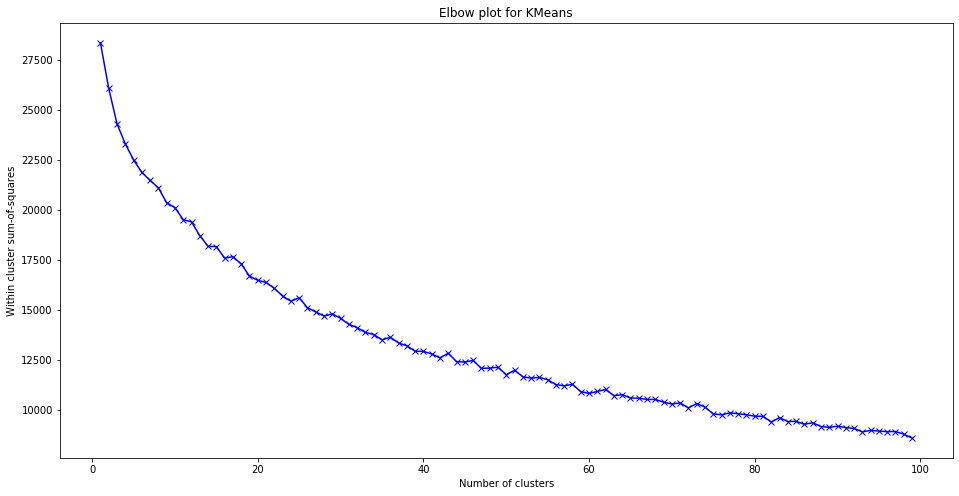

In [183]:
plt.figure(figsize=(16,8))
plt.plot(range(1, 100), wcss, 'bx-')
plt.title('Elbow plot for KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum-of-squares')

The pattern does not seem clear to me. May choose 40 clusters.

In [86]:
kmeans = KMeans(n_clusters=40, random_state=0)
kmeans_pred_y = kmeans.fit_predict(X)

In [92]:
kmeans_pred_y

array([25, 39, 38, ...,  4,  0, 26], dtype=int32)

# Hierarchical Clustering

In [96]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import scipy.cluster.hierarchy as sch

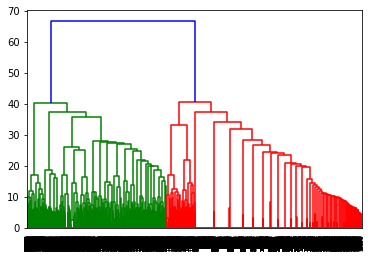

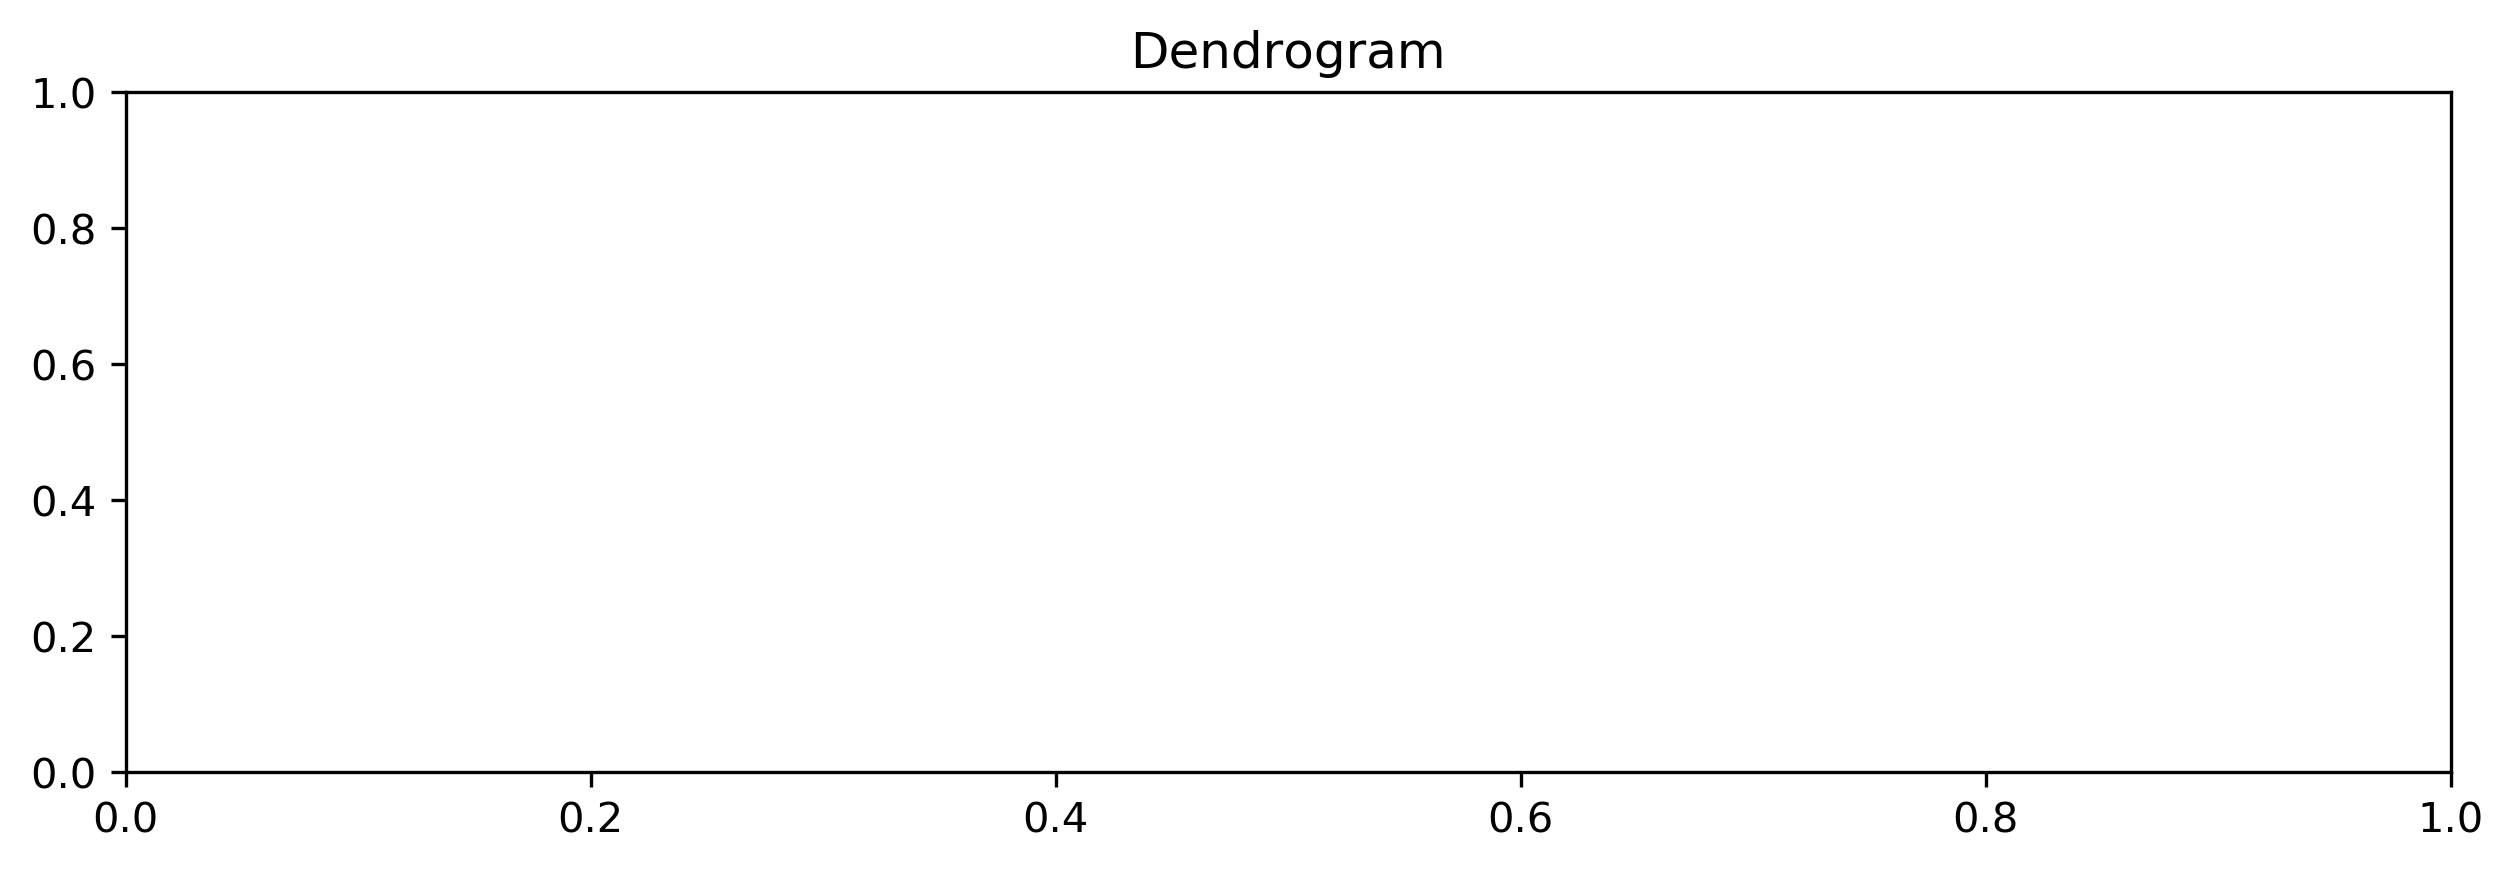

In [98]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.figure(figsize=(10, 3), dpi=300)
plt.title('Dendrogram')
plt.show()

Install networkX

In [99]:
conda install -c anaconda networkx

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [100]:
import networkx as nx

In [170]:
edgelist = question_tag2.dropna()

In [171]:
edgelist.head()

,question_id,tag
0,0,51
0,0,131
0,0,162
0,0,38
1,1,131


In [172]:
edgelist.tag.astype(int)

0         51
0        131
0        162
0         38
1        131
        ... 
13518     14
13519      8
13520     73
13521    125
13522     55
Name: tag, Length: 30090, dtype: int64

In [174]:
edgelist.to_csv('q_tag.txt', header=None, index=None)

In [175]:
sn = nx.read_edgelist('q_tag.txt', create_using = nx.Graph(), delimiter=',', nodetype=int)

In [176]:
print(nx.info(sn))

Name: 
Type: Graph
Number of nodes: 13522
Number of edges: 30082
Average degree:   4.4493


/Users/jiaqingzhang/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


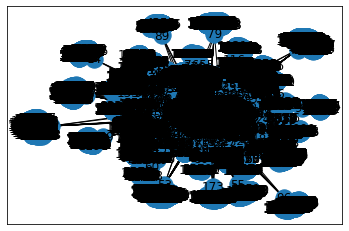

In [177]:

nx.draw_networkx(sn)

In [178]:
pos = nx.spring_layout(sn)
betCent = nx.betweenness_centrality(sn, normalized=True, endpoints=True)
node_color = [20000.0 * sn.degree(v) for v in sn]
node_size = [v * 10000 for v in betCent.values()]

/Users/jiaqingzhang/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


(-1.0934145373949786,
 0.9588296336779374,
 -1.0393942178359186,
 0.9034012139907035)

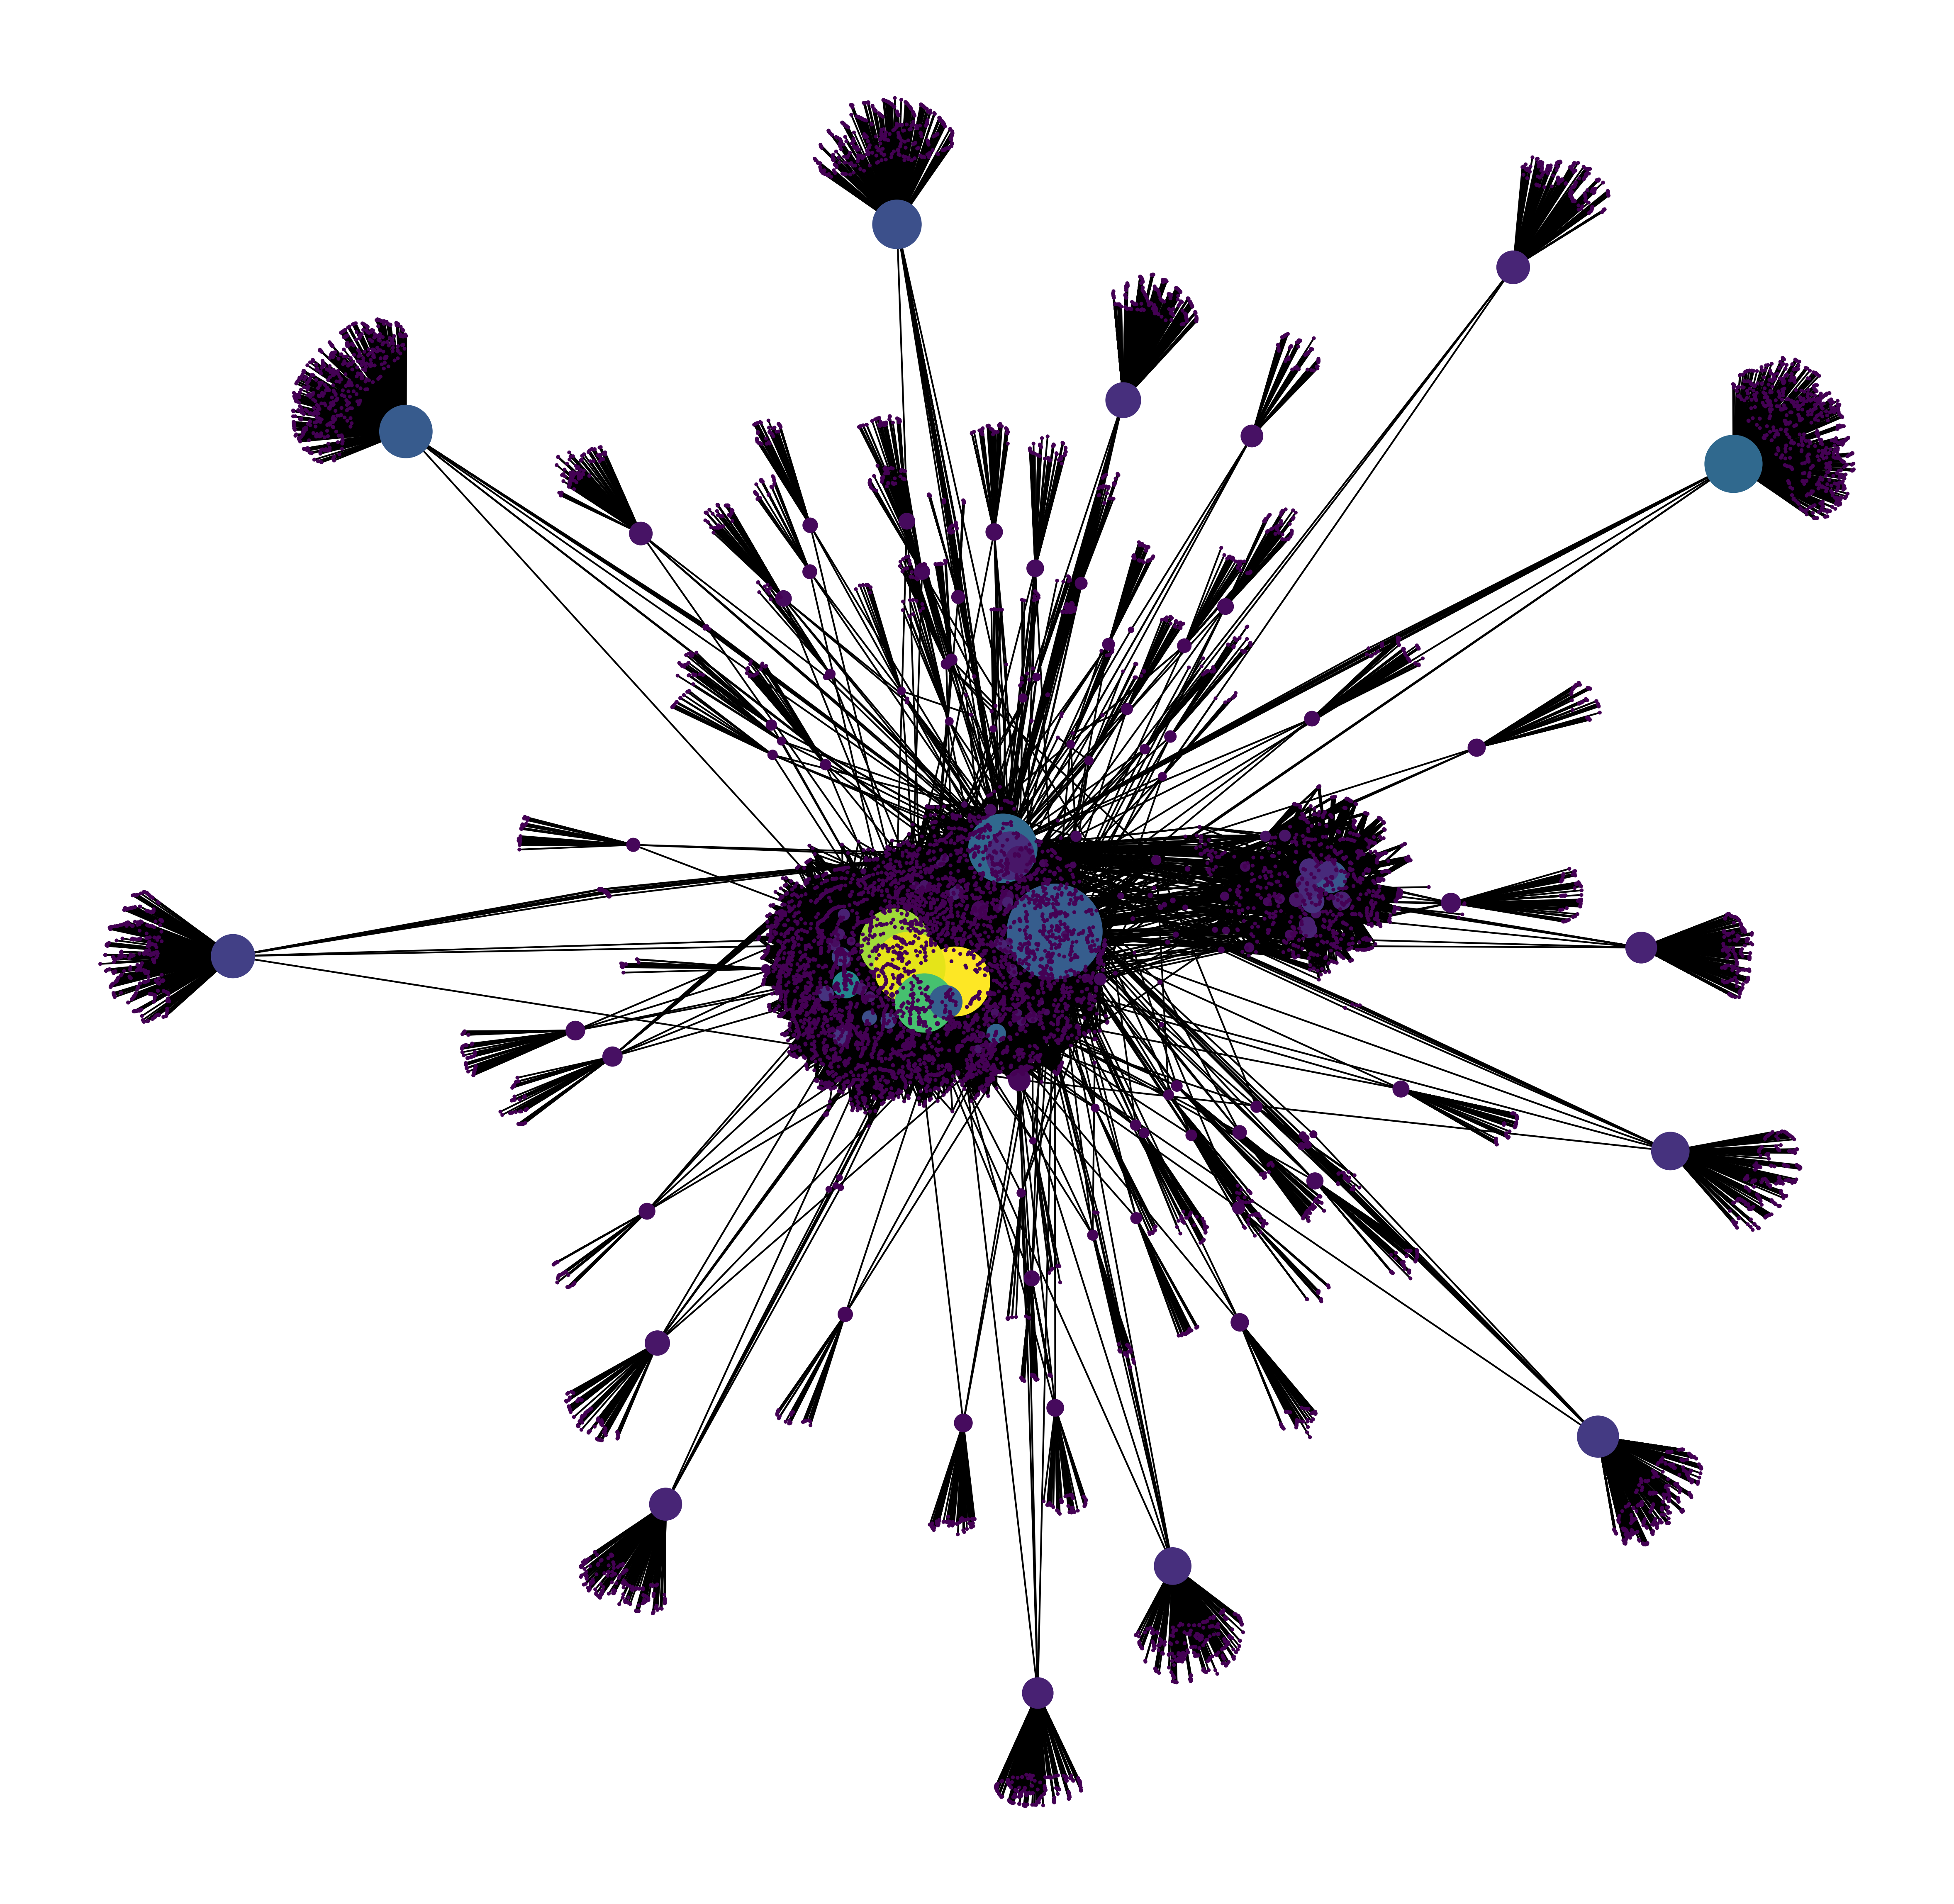

In [179]:
plt.figure(figsize=(20, 20), dpi=300)
nx.draw_networkx(sn, pos=pos, with_labels=False, node_color=node_color, node_size=node_size)
plt.axis('off')